In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal


In [4]:
def generate_data(n_data, means, covariances, weights):
    """creates a list of data points"""
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
   
    return data

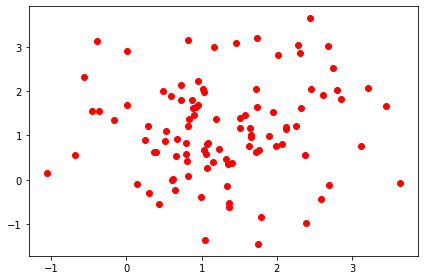

In [11]:

init_means = np.array([
    [1, 1],
    [2,2]
])

init_covariances = np.array([
    [[1, 0.], [0, 1]],
    [[1, 0.], [0, 1]]
    
])

init_weights = [8/10,2/10]

# generate data
np.random.seed(4)
X = generate_data(100, init_means, init_covariances, init_weights)

plt.plot(X[:, 0], X[:, 1], 'ro')
plt.tight_layout()

In [26]:
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.0, 4.0, delta)
    y = np.arange(-2.0, 4.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])

    plt.title(title)
    plt.tight_layout()

True
means_hat [1.57584008 1.96692484 1.10940117 0.60048792]
sds_hat [1.01068454 0.18689034 0.18689034 0.84348458 0.84044094        nan
        nan 0.84440716]
weights_hat [0.38641801 0.61358199]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


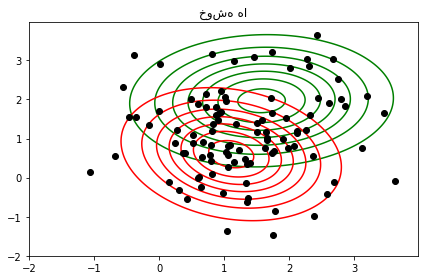

In [27]:

gmm = GaussianMixture(n_components = 2, covariance_type = 'full', 
                      max_iter = 100, random_state = 3)
gmm.fit(X)

print(gmm.converged_)
plot_contours(X, gmm.means_, gmm.covariances_, 'خوشه ها')


means_hat =gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print("means_hat",means_hat)
print("sds_hat",sds_hat)
print("weights_hat",weights_hat)